# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Dataset

In [2]:
path = "/content/drive/MyDrive/Dataset/kidney_disease.csv"
df=pd.read_csv(path)
print(df)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Preprocessing

## Data Reduction

In [5]:
#delete feature 'id' permanently because it is just a sequence of numbers
df.drop(['id'], axis = 1, inplace = True)

## Handling Abnormal Values

In [6]:
#check the unique value for every column/feature
for i in df.columns:
  print(25*"-", i, 25*"-")
  print('\n')
  print(df[i].unique().tolist())

------------------------- age -------------------------


[48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, nan, 73.0, 70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0, 67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0, 71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0, 14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0, 78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0, 22.0, 79.0]
------------------------- bp -------------------------


[80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110.0, 140.0, 180.0, 120.0]
------------------------- sg -------------------------


[1.02, 1.01, 1.005, 1.015, nan, 1.025]
------------------------- al -------------------------


[1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
------------------------- su -------------------------


[0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]
------------------------- rbc -------------------------


[nan, 'normal', 'ab

In [7]:
#there are some misstyped values, for example in column/feature 'classification'
#there exists 'ckd/t', but in the data description, column/feature 'classification'
#consists of 'ckd' and 'notckd'
#so we need to replace the abnormal/misstyped values as follows
df = df.replace({'\t': np.nan , '\t43': 43, '\t6200': 6200 , '\t8400': 8400, '\t?': np.nan, 'ckd\t': "ckd", "\tyes": "yes", "\tno": "no", " yes": "yes"})

## Handling Missing Values

In [8]:
#check the number of missing values for every column/feature
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
#notice that every column/feature except 'classification' has missing values
#so we need to handle it

#we can remove them or do imputation with mean, median, or mode

#but if we remove them, we will only have about 50% of the initial dataset
#because we can see column/feature 'rbc' has 152 missing values

#so the wise choice is to do the imputation
#but notice that the datatype of every column/feature is different (object, int, and float)
#object datatype can only be imputed with mode
#int and float datatype can be imputed with mean, median, mode

#i just wanna make it simple with only one line of code hehe :v
#that is i'm gonna do imputation with mode

df = df.fillna(df.mode().iloc[0])

In [10]:
#check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

In [11]:
#check the values of every column/feature with object datatype
for i in df.select_dtypes(exclude="float").columns:
  print(df[i].value_counts())
  print(50*'=')

normal      353
abnormal     47
Name: rbc, dtype: int64
normal      324
abnormal     76
Name: pc, dtype: int64
notpresent    358
present        42
Name: pcc, dtype: int64
notpresent    378
present        22
Name: ba, dtype: int64
41    92
52    21
44    19
48    19
40    16
43    14
45    13
42    13
33    12
50    12
32    12
36    12
28    12
37    11
34    11
35     9
29     9
46     9
30     9
31     8
24     7
39     7
26     6
38     5
51     4
53     4
49     4
47     4
54     4
25     3
22     3
27     3
19     2
23     2
15     1
21     1
20     1
43     1
17     1
9      1
18     1
16     1
14     1
Name: pcv, dtype: int64
9800     117
6700      10
9200       9
9600       9
7200       9
        ... 
11200      1
19100      1
12300      1
12700      1
16700      1
Name: wc, Length: 91, dtype: int64
5.2    149
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8  

In [12]:
#notice that there is a mistake of datatype of column/feature 'pcv', 'wc', and 'rc'
#which is should be a numeric
#so we need to convert them to be numeric type

df['pcv'] = df['pcv'].astype(float)
df['wc'] = df['wc'].astype(float)
df['rc'] = df['rc'].astype(float)

## Encoding Categoric Data

In [13]:
#we will do the encoding for categoric/object datatype columns/features
#with conditions:
#1 if 'ckd' and the symptom of ckd
#0 if 'notckd' and not the symptom of ckd

#we can search in google for the symptom of ckd :v
#for example i got that one of the symptom of ckd is poor appetite
#so we encode/replace 'poor' to 1 and 'good' to 0 for column/feature 'appet'

#and here what i got:

df['classification'].replace(('notckd', 'ckd'), (0, 1), inplace = True)
df['rbc'].replace(('normal', 'abnormal'), (0, 1), inplace = True)
df['pc'].replace(('normal', 'abnormal'), (0, 1), inplace = True)
df['pcc'].replace(('notpresent', 'present'), (0, 1), inplace = True)
df['ba'].replace(('notpresent', 'present'), (0, 1), inplace = True)
df['htn'].replace(('no', 'yes'), (0, 1), inplace = True)
df['dm'].replace(('no', 'yes'), (0, 1), inplace = True)
df['cad'].replace(('no', 'yes'), (0, 1), inplace = True)
df['appet'].replace(('good', 'poor'), (0, 1), inplace = True)
df['pe'].replace(('no', 'yes'), (0, 1), inplace = True)
df['ane'].replace(('no', 'yes'), (0, 1), inplace = True)

In [14]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,99.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


## Data Visualization

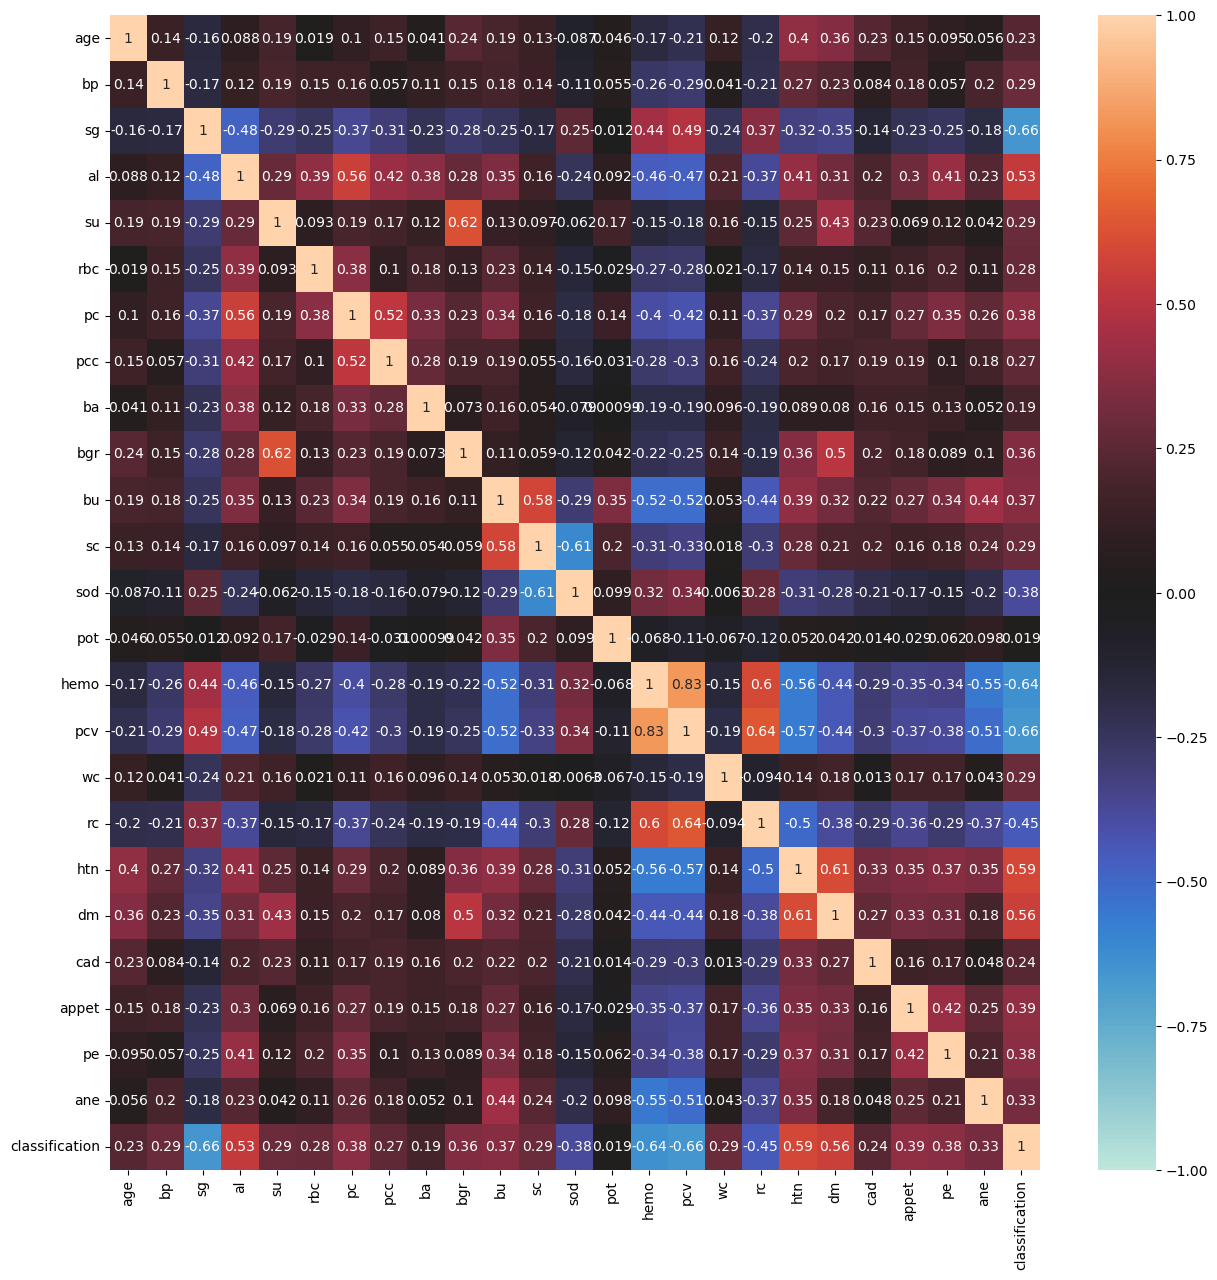

In [15]:
#data correlation
corr = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

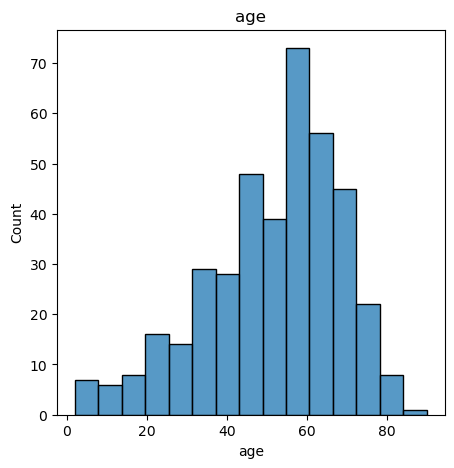

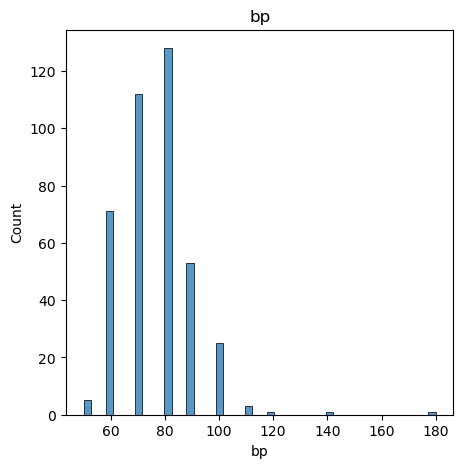

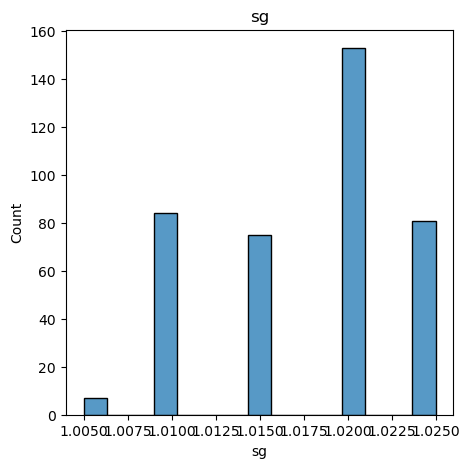

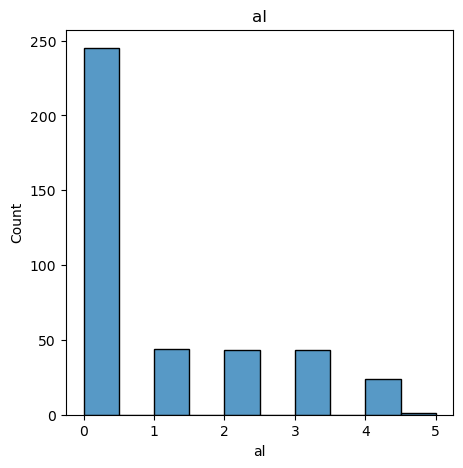

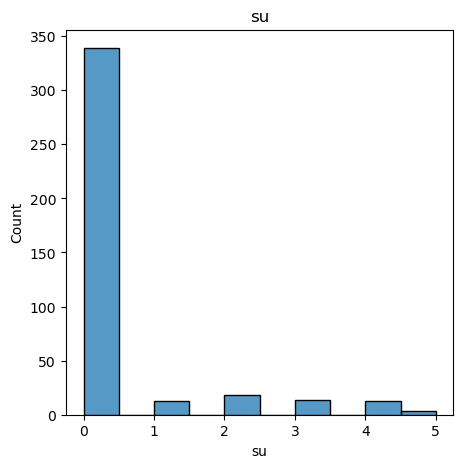

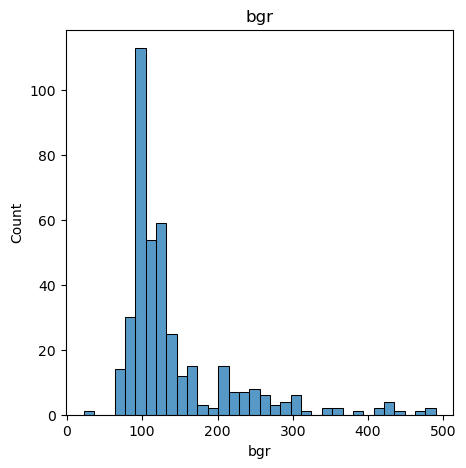

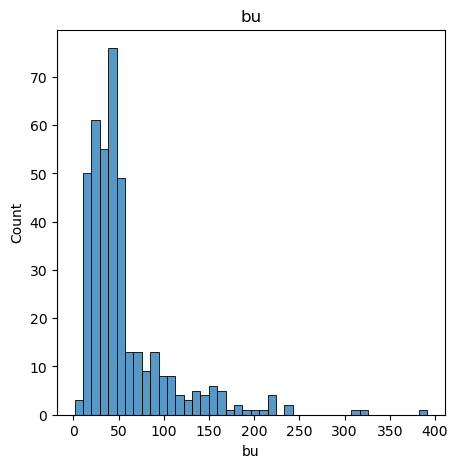

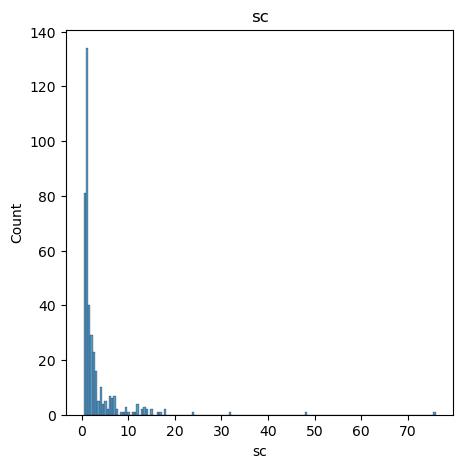

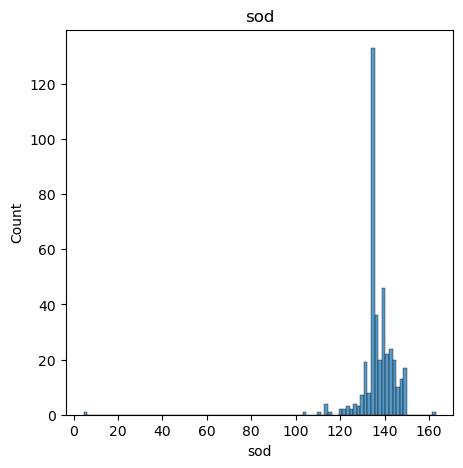

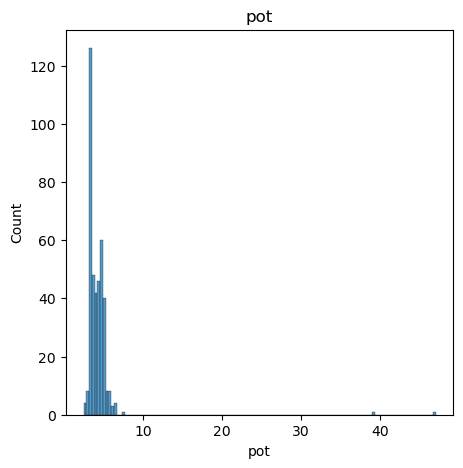

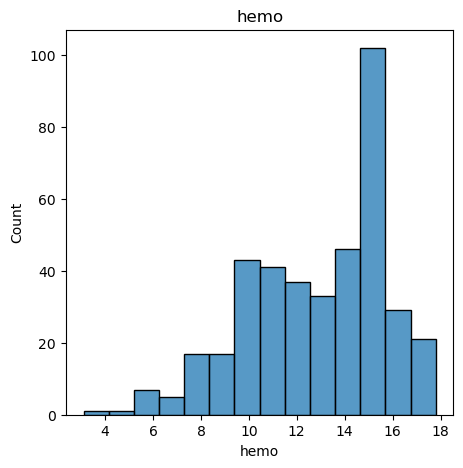

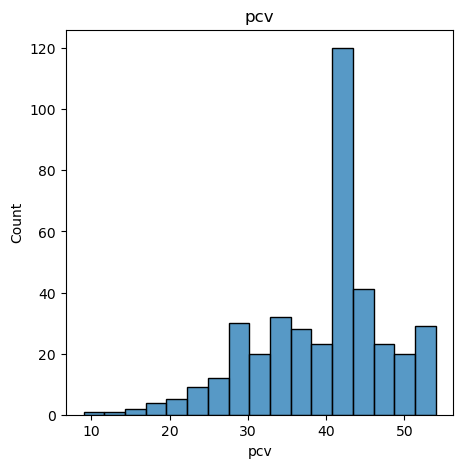

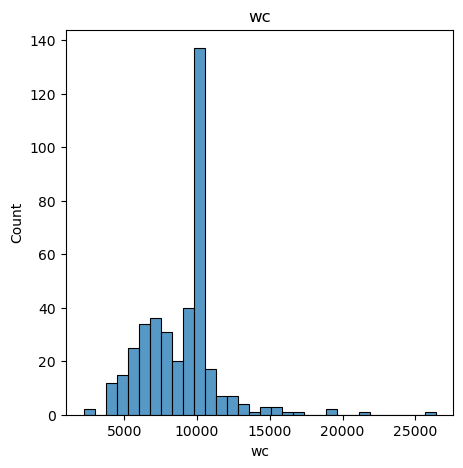

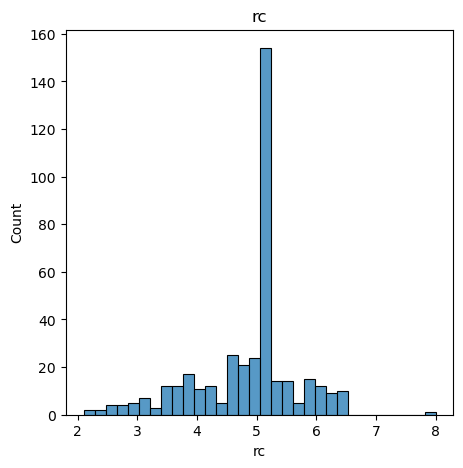

In [16]:
#histogram of numeric columns/features
num = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for i in num:
  plt.figure(figsize = (5,5))
  gph = sns.histplot(df[i])
  gph.set_title(i)
  plt.show

## Data Scaling

In [17]:
#we can see form data visualization that the range of the data for every numeric column/feature are note same
#for example 'pcv' range from 0 to 50 while 'wc' range from 0 to 25000
#so we need to do a scaling

#but first we need to split the predictor and target feature
#the target feature is 'classification'

X = df.drop(['classification'], axis = 1)
y = df['classification']

In [18]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,99.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [20]:
#here i used the minmax scaler
sc = MinMaxScaler()

X = sc.fit_transform(X.to_numpy())

X = pd.DataFrame(X, columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc',
                               'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
                               'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,0.211538,...,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.164530,...,0.557823,0.644444,0.157025,0.525424,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,...,0.442177,0.488889,0.219008,0.525424,0.0,1.0,0.0,1.0,0.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,...,0.551020,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,...,0.578231,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.252137,...,0.857143,0.844444,0.185950,0.474576,0.0,0.0,0.0,0.0,0.0,0.0
396,0.454545,0.153846,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.113248,...,0.911565,1.000000,0.231405,0.694915,0.0,0.0,0.0,0.0,0.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.863946,0.888889,0.181818,0.559322,0.0,0.0,0.0,0.0,0.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.196581,...,0.755102,0.933333,0.206612,0.644068,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [21]:
dummy_model = ExtraTreesClassifier()
dummy_model.fit(X,y)
print(dummy_model.feature_importances_)

[0.0108774  0.0128704  0.16462414 0.07775418 0.01168588 0.02157609
 0.02315685 0.00957539 0.00173606 0.01732469 0.01414883 0.02174348
 0.01464681 0.01045126 0.06634672 0.10469761 0.01071637 0.01630461
 0.15397347 0.13426522 0.00427608 0.04567144 0.03742173 0.01415531]


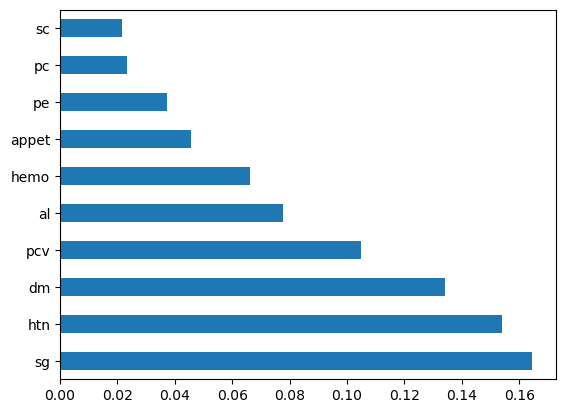

In [22]:
#here im gonna choose 10 best features for the predictor
feat_importances = pd.Series(dummy_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
selected = ['sc', 'pe', 'pc', 'appet', 'hemo', 'al', 'pcv', 'dm', 'sg', 'htn']
unselected = list(set(X.columns) - set(selected))

X_selected = X.drop(unselected, axis = 1)

In [24]:
X_selected

,sg,al,pc,sc,hemo,pcv,htn,dm,appet,pe
0,0.75,0.2,0.0,0.010582,0.836735,0.777778,1.0,1.0,0.0,0.0
1,0.75,0.8,0.0,0.005291,0.557823,0.644444,0.0,0.0,0.0,0.0
2,0.25,0.4,0.0,0.018519,0.442177,0.488889,0.0,1.0,1.0,0.0
3,0.00,0.8,1.0,0.044974,0.551020,0.511111,1.0,0.0,1.0,1.0
4,0.25,0.4,0.0,0.013228,0.578231,0.577778,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.75,0.0,0.0,0.001323,0.857143,0.844444,0.0,0.0,0.0,0.0
396,1.00,0.0,0.0,0.010582,0.911565,1.000000,0.0,0.0,0.0,0.0
397,0.75,0.0,0.0,0.002646,0.863946,0.888889,0.0,0.0,0.0,0.0
398,1.00,0.0,0.0,0.007937,0.755102,0.933333,0.0,0.0,0.0,0.0


# Splitting Data

In [25]:
#i split the data into 80% data train and 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [26]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (320, 10)
y train shape:  (320,)
X test shape:  (80, 10)
y test shape:  (80,)


# Build ANN Model

In [27]:
tf.keras.backend.clear_session()

#here i build the ANN with 2 hidden layers consists of 10 and 5 neurons respectively
#the activation function that i used is relu for hidden layer and sigmoid for output layer

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_selected.shape[1],)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss',
                                              restore_best_weights = True,
                                              verbose = 1)

history_ann = model.fit(X_train, y_train,
                              validation_split = 0.2,
                              epochs = 50, batch_size = 32,
                              callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.7218 - accuracy: 0.3906 - val_loss: 0.7106 - val_accuracy: 0.4219
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7033 - accuracy: 0.3945 - val_loss: 0.6904 - val_accuracy: 0.4531
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.4414 - val_loss: 0.6731 - val_accuracy: 0.5625
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6741 - accuracy: 0.5312 - val_loss: 0.6611 - val_accuracy: 0.6875
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6624 - accuracy: 0.6406 - val_loss: 0.6495 - val_accuracy: 0.7500
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.7266 - val_loss: 0.6368 - val_accuracy: 0.7969
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6372 - accuracy: 0.7812 - val_loss: 0.6223 - val_accuracy: 0.8281
Epoch 8/50
8/8 [=================

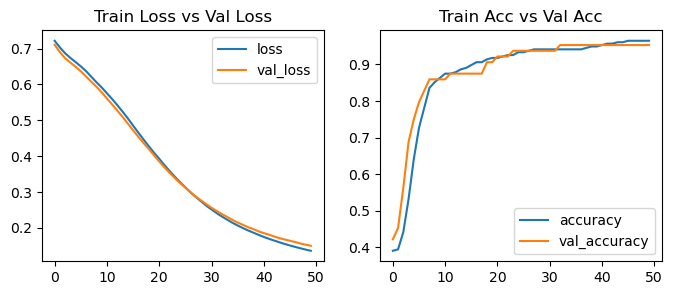

In [29]:
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
accuracy = history_ann.history['accuracy']
val_accuracy = history_ann.history['val_accuracy']
epochs = range(len(loss))

fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')
ax[0].set_title('Train Loss vs Val Loss')
ax[1].plot(epochs, accuracy)
ax[1].plot(epochs, val_accuracy)
ax[1].legend(['accuracy', 'val_accuracy'], loc='lower right')
ax[1].set_title('Train Acc vs Val Acc')
plt.show()

# Hyperparameter Tuning

In [30]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [31]:
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    n_hid_layers = hp.Int('n_hid_layers', 1, 2)
    for layer in range(n_hid_layers):
        n_neurons = hp.Int(f'n_neurons_{layer}', 5, 125, step = 15)
        act = hp.Choice(f'activation_{layer}',
                        ['relu', 'linear', 'sigmoid'])
        model.add(tf.keras.layers.Dense(n_neurons, activation = act))

    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

    lr = hp.Float('learning_rate', 1e-5, 1e-2)
    opt = tf.keras.optimizers.Adam(learning_rate = lr)
    model.compile(optimizer = opt, loss = 'binary_crossentropy')

    return model

In [32]:
tf.keras.backend.clear_session()

tuner = kt.BayesianOptimization(hypermodel = build_model,
                                objective = 'val_loss',
                                max_trials = 10,
                                directory = 'tuner_dir_0',
                                project_name = 'tune_model')

tuner.search_space_summary()

Search space summary
Default search space size: 4
n_hid_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
n_neurons_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 125, 'step': 15, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [33]:
tuner.search(X_train, y_train, validation_split = 0.2,
             epochs = 100, batch_size = 32)

Trial 10 Complete [00h 00m 07s]
val_loss: 0.028959661722183228

Best val_loss So Far: 0.0008808334241621196
Total elapsed time: 00h 01m 22s


In [34]:
tuner.results_summary(3)

Results summary
Results in tuner_dir_0/tune_model
Showing 3 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
n_hid_layers: 2
n_neurons_0: 110
activation_0: relu
learning_rate: 0.0051115040342137145
n_neurons_1: 50
activation_1: sigmoid
Score: 0.0008808334241621196

Trial 03 summary
Hyperparameters:
n_hid_layers: 2
n_neurons_0: 110
activation_0: relu
learning_rate: 0.004045471420338661
n_neurons_1: 5
activation_1: relu
Score: 0.00269140861928463

Trial 06 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 65
activation_0: relu
learning_rate: 0.009803495779715034
n_neurons_1: 110
activation_1: sigmoid
Score: 0.005898609757423401


# Retrain Best Model

In [35]:
model = build_model(tuner.get_best_hyperparameters()[0])
model.build(input_shape=(None,) + X_train.shape[1:])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 110)               1210      
                                                                 
 dense_3 (Dense)             (None, 50)                5550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,811
Trainable params: 6,811
Non-trainable params: 0
_________________________________________________________________


In [36]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                              restore_best_weights = True,
                                              verbose = 1)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 500, batch_size = 32, callbacks = [early_stop])

Epoch 1/500
8/8 [==============================] - 1s 26ms/step - loss: 0.5761 - val_loss: 0.4457
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.3591 - val_loss: 0.2486
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2069 - val_loss: 0.1566
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1351 - val_loss: 0.1226
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1039 - val_loss: 0.1035
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.0913
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0674 - val_loss: 0.0831
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0597 - val_loss: 0.0773
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0514 - val_loss: 0.0717
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.0672
Epoch 11/500
8/8 [==========

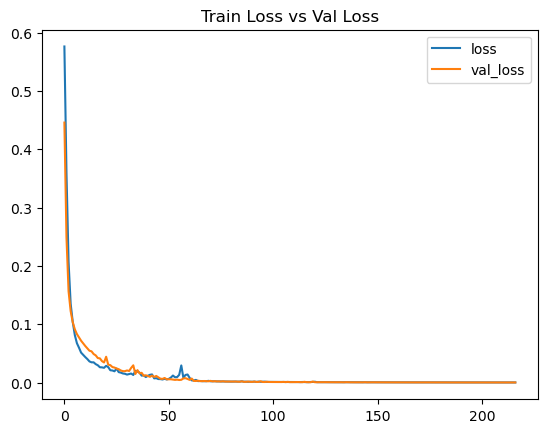

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

# Model Evaluation

In [38]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0032


0.0032157576642930508

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



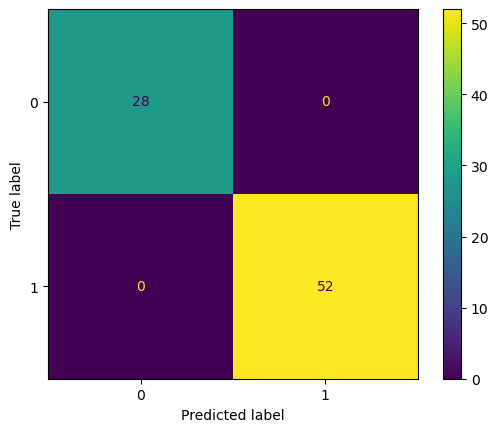

In [39]:
#predicting with model
prob = model.predict(X_test) #probability of patient has ckd
y_pred = np.round(prob)
#the probability rounded so
#y_pred = 1 means ckd and y_pred = 0 means notckd

#confusion matrix
confmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confmat).plot()

#classification report
print(classification_report(y_test, y_pred))

# Save Model

In [40]:
import joblib
joblib.dump(model,'model_CKD.pkl')

['model_CKD.pkl']